In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

C:\Users\Krzysiek\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./properties_data.csv')

In [4]:
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,1.0,2,Medium,1,...,1,0,1.0,0,0,0,0,1.0,NaN,1
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,2.0,2,Medium,1,...,0,0,0.0,0,0,0,0,1.0,NaN,1
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,3.0,5,Medium,0,...,0,1,0.0,0,0,0,1,1.0,1.0,1
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,NaN,3,Low,0,...,1,1,1.0,0,0,0,0,0.0,0.0,0
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,0.0,1,Medium,1,...,0,1,0.0,0,0,0,1,1.0,1.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1890 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   no_of_bedrooms       1811 non-null   float64
 7   no_of_bathrooms      1905 non-null   int64  
 8   quality              1905 non-null   object 
 9   furnished            1905 non-null   int64  
 10  balcony              1905 non-null   int64  
 11  barbecue_area        1905 non-null   int64  
 12  central_ac           1905 non-null   int64  
 13  childrens_play_area  1905 non-null   int64  
 14  concierge            1905 non-null   int64  
 15  covered_parking      1905 non-null   i

In [6]:
df.describe()

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,furnished,balcony,barbecue_area,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
count,1.905000e+03,1890.000000,1905.000000,1.905000e+03,1905.000000,1811.000000,1905.000000,1905.000000,1905.000000,1905.000000,...,1905.00000,1905.000000,1864.000000,1905.000000,1905.000000,1905.000000,1905.000000,1885.000000,1754.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1.796797,2.512861,0.358530,0.719685,0.141207,...,0.35643,0.618373,0.297747,0.016798,0.007874,0.043045,0.352231,0.661008,0.206385,0.343307
std,1.925252e+05,0.062632,0.068794,2.913200e+06,891.487639,0.955132,1.063117,0.479695,0.449271,0.348327,...,0.47907,0.485913,0.457390,0.128547,0.088409,0.203011,0.477791,0.473493,0.404826,0.474938
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.560167e+06,25.072832,55.145389,8.900000e+05,840.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.670328e+06,25.188114,55.271797,2.200000e+06,1703.000000,2.000000,3.000000,1.000000,1.000000,0.000000,...,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,5.000000,6.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'quality', 'furnished', 'balcony',
       'barbecue_area', 'central_ac', 'childrens_play_area', 'concierge',
       'covered_parking', 'pets_allowed', 'private_garden', 'private_gym',
       'private_pool', 'security', 'shared_gym', 'view_of_landmark',
       'view_of_water'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop('id', axis=1, inplace=True) # id już mamy

In [10]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True) # bezsensowne dane, lokalizacja w neighborhood

In [11]:
df.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,Palm Jumeirah,2700000,1079,1.0,2,Medium,1,1,1,1,...,1,0,1.0,0,0,0,0,1.0,NaN,1
1,Palm Jumeirah,2850000,1582,2.0,2,Medium,1,1,0,1,...,0,0,0.0,0,0,0,0,1.0,NaN,1
2,Jumeirah Lake Towers,1150000,1951,3.0,5,Medium,0,1,0,0,...,0,1,0.0,0,0,0,1,1.0,1.0,1
3,Culture Village,2850000,2020,NaN,3,Low,0,1,0,0,...,1,1,1.0,0,0,0,0,0.0,0.0,0
4,Palm Jumeirah,1729200,507,0.0,1,Medium,1,0,0,1,...,0,1,0.0,0,0,0,1,1.0,1.0,1


# 1 Analiza zmiennej celu

In [12]:
df['price'].value_counts()

1300000    31
1650000    29
1200000    28
1100000    26
1700000    24
           ..
1880000     1
3550000     1
1019000     1
290000      1
954366      1
Name: price, Length: 821, dtype: int64

In [13]:
# mamy bardzo dużo różnych wartości w zmiennej celu

# 2 Analiza pozostałych wartości

In [14]:
cat_vars = ['neighborhood', 'quality']

In [15]:
for var in cat_vars:
    print('Wartość zmiennej', var, ':')
    print(df[var].value_counts())
    print('\n')

Wartość zmiennej neighborhood :
Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Greens                                30
Dubai Harbour                         30
Town Square                           27
Motor City                            27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Old Town                              17
Meydan                                17
City Walk                             14
Umm Suqeim               

In [16]:
# neighborhood powyżej 50 -> other
indexes = df['neighborhood'].value_counts().index
other = []

values = df['neighborhood'].value_counts()
i = 0
for value in values:
    if (value < 50):
        other.append(indexes[i])
    i = i+1

In [17]:
for x in range(df.shape[0]):   # shape -> ile wierszy i kolumn
    if df.loc[x,'neighborhood'] in other:
        df.loc[x,'neighborhood'] = 'Other'

In [18]:
df['neighborhood'].value_counts()

Other                       601
Downtown Dubai              302
Dubai Marina                288
Jumeirah Village Circle     200
Palm Jumeirah               178
Jumeirah Beach Residence    116
Business Bay                 97
Jumeirah Lake Towers         70
Dubai Hills Estate           53
Name: neighborhood, dtype: int64

In [19]:
df.head()

,neighborhood,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,...,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
0,Palm Jumeirah,2700000,1079,1.0,2,Medium,1,1,1,1,...,1,0,1.0,0,0,0,0,1.0,NaN,1
1,Palm Jumeirah,2850000,1582,2.0,2,Medium,1,1,0,1,...,0,0,0.0,0,0,0,0,1.0,NaN,1
2,Jumeirah Lake Towers,1150000,1951,3.0,5,Medium,0,1,0,0,...,0,1,0.0,0,0,0,1,1.0,1.0,1
3,Other,2850000,2020,NaN,3,Low,0,1,0,0,...,1,1,1.0,0,0,0,0,0.0,0.0,0
4,Palm Jumeirah,1729200,507,0.0,1,Medium,1,0,0,1,...,0,1,0.0,0,0,0,1,1.0,1.0,1


In [20]:
quant_vars = ['price', 'size_in_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'furnished', 'balcony',
       'barbecue_area', 'central_ac', 'childrens_play_area', 'concierge',
       'covered_parking', 'pets_allowed', 'private_garden', 'private_gym',
       'private_pool', 'security', 'shared_gym', 'view_of_landmark',
       'view_of_water']

In [21]:
for i in quant_vars:
    print(df[i].value_counts())

1300000    31
1650000    29
1200000    28
1100000    26
1700000    24
           ..
1880000     1
3550000     1
1019000     1
290000      1
954366      1
Name: price, Length: 821, dtype: int64
1300    10
1400    10
851      9
1133     8
745      7
        ..
5018     1
925      1
926      1
930      1
2046     1
Name: size_in_sqft, Length: 1121, dtype: int64
2.0    686
1.0    607
3.0    326
0.0    119
4.0     68
5.0      5
Name: no_of_bedrooms, dtype: int64
2    723
3    553
1    311
4    230
5     77
6     11
Name: no_of_bathrooms, dtype: int64
0    1222
1     683
Name: furnished, dtype: int64
1    1371
0     534
Name: balcony, dtype: int64
0    1636
1     269
Name: barbecue_area, dtype: int64
1    1301
0     604
Name: central_ac, dtype: int64
0    1266
1     639
Name: childrens_play_area, dtype: int64
0    1226
1     679
Name: concierge, dtype: int64
1    1178
0     727
Name: covered_parking, dtype: int64
0.0    1309
1.0     555
Name: pets_allowed, dtype: int64
0    1873
1      32
Na

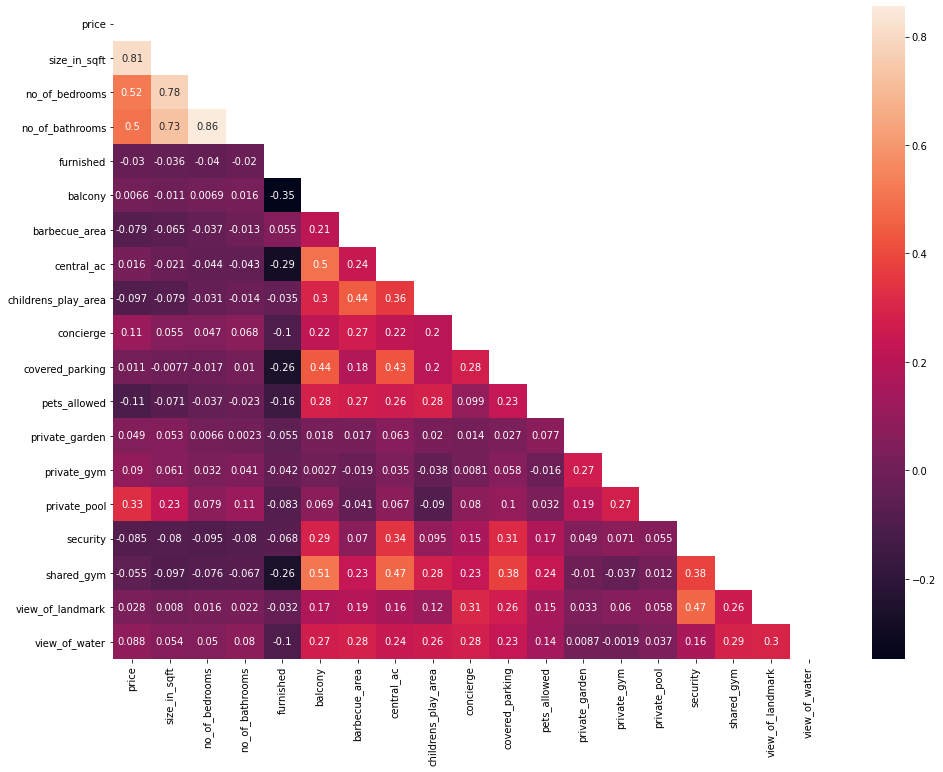

In [22]:
corr_matrix = df.corr() 
upper_matrix = np.triu(corr_matrix)
plt.subplots(figsize=(16,12)) # zwiększanie rozmiaru wykresu
sns.heatmap(corr_matrix, annot=True, mask=upper_matrix)   # annot-> pokazuje liczby na wykresie, mask - ukrycie
plt.show()

In [23]:
# mocna korelacja bedrooms a bathrooms, docelowo do usunięcia no_of_bathrooms (mniejsza korelacja z price)
# inne zmienne nie korelują ze sobą

In [24]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99) 

In [25]:
X_test.head()

,neighborhood,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water
797,Other,956,1.0,2,Medium,0,1,0,0,0,1,1,0.0,0,0,0,0,1.0,0.0,0
1216,Other,1845,2.0,2,Low,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0
16,Palm Jumeirah,1633,2.0,2,Medium,0,1,1,1,0,1,0,0.0,0,0,0,0,1.0,0.0,1
253,Other,402,1.0,2,Low,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0
998,Other,1442,2.0,2,Low,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0


In [26]:
quant_vars = ['size_in_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'furnished', 'balcony',
       'barbecue_area', 'central_ac', 'childrens_play_area', 'concierge',
       'covered_parking', 'pets_allowed', 'private_garden', 'private_gym',
       'private_pool', 'security', 'shared_gym', 'view_of_landmark',
       'view_of_water']

# 4 Braki danych

In [27]:
X_train.isna().sum()

neighborhood             0
size_in_sqft             0
no_of_bedrooms          58
no_of_bathrooms          0
quality                  0
furnished                0
balcony                  0
barbecue_area            0
central_ac               0
childrens_play_area      0
concierge                0
covered_parking          0
pets_allowed            28
private_garden           0
private_gym              0
private_pool             0
security                 0
shared_gym              11
view_of_landmark       105
view_of_water            0
dtype: int64

In [28]:
# bedrooms zależna jest od bathrooms, dlatego z niej korzystam

In [29]:
bedd = X_train.groupby('no_of_bathrooms')['no_of_bedrooms'].median()

In [30]:
bedd = bedd.reset_index()
X_train = pd.merge(X_train.reset_index(), bedd, how='left', on=['no_of_bathrooms'])
X_train.head(10)

,index,neighborhood,size_in_sqft,no_of_bedrooms_x,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,...,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water,no_of_bedrooms_y
0,1002,Dubai Marina,1788,3.0,4,Low,0,1,0,1,...,0,0.0,0,0,0,0,0.0,0.0,1,3.0
1,40,Dubai Marina,1002,NaN,2,Medium,1,1,0,1,...,1,0.0,0,0,0,0,1.0,0.0,1,1.0
2,757,Downtown Dubai,653,1.0,1,Medium,0,1,0,1,...,0,0.0,0,0,0,1,1.0,0.0,0,1.0
3,1770,Downtown Dubai,1639,2.0,3,High,1,0,1,1,...,1,0.0,0,0,0,1,1.0,1.0,1,2.0
4,736,Jumeirah Village Circle,666,1.0,2,Medium,0,1,0,1,...,0,0.0,0,0,0,1,1.0,0.0,0,1.0
5,295,Other,820,1.0,2,Medium,0,0,0,0,...,1,0.0,0,0,0,0,0.0,1.0,1,1.0
6,447,Other,603,1.0,1,Medium,0,1,1,1,...,1,0.0,0,0,0,0,1.0,0.0,0,1.0
7,1771,Downtown Dubai,1133,1.0,2,Medium,0,0,0,1,...,1,0.0,0,0,0,1,1.0,0.0,0,1.0
8,1589,Business Bay,1055,2.0,3,High,1,1,0,1,...,1,0.0,0,0,0,1,1.0,1.0,0,2.0
9,1263,Other,1329,2.0,2,Low,1,0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0,1.0


In [31]:
X_train['no_of_bedrooms'] = np.where(X_train['no_of_bedrooms_x'].isna(), X_train['no_of_bedrooms_y'], X_train['no_of_bedrooms_x'])

In [32]:
X_train.head(10)

,index,neighborhood,size_in_sqft,no_of_bedrooms_x,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,...,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water,no_of_bedrooms_y,no_of_bedrooms
0,1002,Dubai Marina,1788,3.0,4,Low,0,1,0,1,...,0.0,0,0,0,0,0.0,0.0,1,3.0,3.0
1,40,Dubai Marina,1002,NaN,2,Medium,1,1,0,1,...,0.0,0,0,0,0,1.0,0.0,1,1.0,1.0
2,757,Downtown Dubai,653,1.0,1,Medium,0,1,0,1,...,0.0,0,0,0,1,1.0,0.0,0,1.0,1.0
3,1770,Downtown Dubai,1639,2.0,3,High,1,0,1,1,...,0.0,0,0,0,1,1.0,1.0,1,2.0,2.0
4,736,Jumeirah Village Circle,666,1.0,2,Medium,0,1,0,1,...,0.0,0,0,0,1,1.0,0.0,0,1.0,1.0
5,295,Other,820,1.0,2,Medium,0,0,0,0,...,0.0,0,0,0,0,0.0,1.0,1,1.0,1.0
6,447,Other,603,1.0,1,Medium,0,1,1,1,...,0.0,0,0,0,0,1.0,0.0,0,1.0,1.0
7,1771,Downtown Dubai,1133,1.0,2,Medium,0,0,0,1,...,0.0,0,0,0,1,1.0,0.0,0,1.0,1.0
8,1589,Business Bay,1055,2.0,3,High,1,1,0,1,...,0.0,0,0,0,1,1.0,1.0,0,2.0,2.0
9,1263,Other,1329,2.0,2,Low,1,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,1.0,2.0


In [33]:
X_train.drop(['no_of_bedrooms_x', 'no_of_bedrooms_y'], inplace=True, axis=1)

In [34]:
X_train.head(10)

,index,neighborhood,size_in_sqft,no_of_bathrooms,quality,furnished,balcony,barbecue_area,central_ac,childrens_play_area,...,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,shared_gym,view_of_landmark,view_of_water,no_of_bedrooms
0,1002,Dubai Marina,1788,4,Low,0,1,0,1,0,...,0,0.0,0,0,0,0,0.0,0.0,1,3.0
1,40,Dubai Marina,1002,2,Medium,1,1,0,1,0,...,1,0.0,0,0,0,0,1.0,0.0,1,1.0
2,757,Downtown Dubai,653,1,Medium,0,1,0,1,0,...,0,0.0,0,0,0,1,1.0,0.0,0,1.0
3,1770,Downtown Dubai,1639,3,High,1,0,1,1,1,...,1,0.0,0,0,0,1,1.0,1.0,1,2.0
4,736,Jumeirah Village Circle,666,2,Medium,0,1,0,1,0,...,0,0.0,0,0,0,1,1.0,0.0,0,1.0
5,295,Other,820,2,Medium,0,0,0,0,0,...,1,0.0,0,0,0,0,0.0,1.0,1,1.0
6,447,Other,603,1,Medium,0,1,1,1,1,...,1,0.0,0,0,0,0,1.0,0.0,0,1.0
7,1771,Downtown Dubai,1133,2,Medium,0,0,0,1,1,...,1,0.0,0,0,0,1,1.0,0.0,0,1.0
8,1589,Business Bay,1055,3,High,1,1,0,1,1,...,1,0.0,0,0,0,1,1.0,1.0,0,2.0
9,1263,Other,1329,2,Low,1,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0,2.0


In [35]:
X_train.isna().sum()

index                    0
neighborhood             0
size_in_sqft             0
no_of_bathrooms          0
quality                  0
furnished                0
balcony                  0
barbecue_area            0
central_ac               0
childrens_play_area      0
concierge                0
covered_parking          0
pets_allowed            28
private_garden           0
private_gym              0
private_pool             0
security                 0
shared_gym              11
view_of_landmark       105
view_of_water            0
no_of_bedrooms           0
dtype: int64

In [36]:
X_test = pd.merge(X_test.reset_index(), bedd, how='left', on=['no_of_bathrooms'])
X_test['no_of_bedrooms'] = np.where(X_test['no_of_bedrooms_x'].isna(), X_test['no_of_bedrooms_y'], X_test['no_of_bedrooms_x'])
X_test.drop(['no_of_bedrooms_x', 'no_of_bedrooms_y'], inplace=True, axis=1)
X_test.isna().sum()

index                   0
neighborhood            0
size_in_sqft            0
no_of_bathrooms         0
quality                 0
furnished               0
balcony                 0
barbecue_area           0
central_ac              0
childrens_play_area     0
concierge               0
covered_parking         0
pets_allowed           13
private_garden          0
private_gym             0
private_pool            0
security                0
shared_gym              9
view_of_landmark       46
view_of_water           0
no_of_bedrooms          0
dtype: int64

In [37]:
# pets_allowed nie zależna od żadnej zmiennej więc braki wrzucam w 0.0 (najwięcej wartości)

In [38]:
X_train['pets_allowed'].value_counts()

0.0    916
1.0    389
Name: pets_allowed, dtype: int64

In [39]:
X_train['pets_allowed'].value_counts()
X_train['pets_allowed'].fillna(0.0, inplace=True)
X_test['pets_allowed'].fillna(0.0, inplace=True)

In [40]:
# shared_gym mocno zależna od balcony

In [41]:
X_train['shared_gym'].value_counts()

1.0    865
0.0    457
Name: shared_gym, dtype: int64

In [42]:
agg = X_train.groupby(['balcony']).agg({'shared_gym': 'median'})
agg = agg.reset_index()
X_train = pd.merge(X_train, agg, how='left', on=['balcony'])
X_train['shared_gym'] = np.where(X_train['shared_gym_x'].isna(), X_train['shared_gym_y'].round(), X_train['shared_gym_x'])
X_train.drop(['shared_gym_x', 'shared_gym_y'], axis=1, inplace=True)

In [43]:
agg = X_test.groupby(['balcony']).agg({'shared_gym': 'median'})
agg = agg.reset_index()
X_test = pd.merge(X_test, agg, how='left', on=['balcony'])
X_test['shared_gym'] = np.where(X_test['shared_gym_x'].isna(), X_test['shared_gym_y'].round(), X_test['shared_gym_x'])
X_test.drop(['shared_gym_x', 'shared_gym_y'], axis=1, inplace=True)

In [44]:
# view_of_landmark zależne od security

In [45]:
X_train['view_of_landmark'].value_counts()

0.0    973
1.0    255
Name: view_of_landmark, dtype: int64

In [46]:
agg = X_train.groupby(['security']).agg({'view_of_landmark': 'median'})
agg = agg.reset_index()
X_train = pd.merge(X_train, agg, how='left', on=['security'])
X_train['view_of_landmark'] = np.where(X_train['view_of_landmark_x'].isna(), X_train['view_of_landmark_y'].round(), X_train['view_of_landmark_x'])
X_train.drop(['view_of_landmark_x', 'view_of_landmark_y'], axis=1, inplace=True)

In [47]:
agg = X_test.groupby(['security']).agg({'view_of_landmark': 'median'})
agg = agg.reset_index()
X_test = pd.merge(X_test, agg, how='left', on=['security'])
X_test['view_of_landmark'] = np.where(X_test['view_of_landmark_x'].isna(), X_test['view_of_landmark_y'].round(), X_test['view_of_landmark_x'])
X_test.drop(['view_of_landmark_x', 'view_of_landmark_y'], axis=1, inplace=True)

In [48]:
X_train.isna().sum()

index                  0
neighborhood           0
size_in_sqft           0
no_of_bathrooms        0
quality                0
furnished              0
balcony                0
barbecue_area          0
central_ac             0
childrens_play_area    0
concierge              0
covered_parking        0
pets_allowed           0
private_garden         0
private_gym            0
private_pool           0
security               0
view_of_water          0
no_of_bedrooms         0
shared_gym             0
view_of_landmark       0
dtype: int64

In [49]:
# usuwam bathrooms (b. mocna zależność z bedrooms)
X_train.drop('no_of_bathrooms', inplace=True, axis=1)
X_test.drop('no_of_bathrooms', inplace=True, axis=1)

In [50]:
X_train

,index,neighborhood,size_in_sqft,quality,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,view_of_water,no_of_bedrooms,shared_gym,view_of_landmark
0,1002,Dubai Marina,1788,Low,0,1,0,1,0,0,0,0.0,0,0,0,0,1,3.0,0.0,0.0
1,40,Dubai Marina,1002,Medium,1,1,0,1,0,0,1,0.0,0,0,0,0,1,1.0,1.0,0.0
2,757,Downtown Dubai,653,Medium,0,1,0,1,0,0,0,0.0,0,0,0,1,0,1.0,1.0,0.0
3,1770,Downtown Dubai,1639,High,1,0,1,1,1,1,1,0.0,0,0,0,1,1,2.0,1.0,1.0
4,736,Jumeirah Village Circle,666,Medium,0,1,0,1,0,0,0,0.0,0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1737,Other,1534,Medium,0,1,0,1,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0.0
1329,1192,Dubai Marina,1775,Medium,0,1,0,1,0,0,1,0.0,0,0,0,1,0,3.0,0.0,0.0
1330,1209,Other,1521,Medium,1,1,0,1,0,0,1,0.0,0,0,0,1,0,1.0,1.0,1.0
1331,1059,Jumeirah Beach Residence,766,Medium,0,0,0,1,0,0,0,0.0,0,0,0,0,1,1.0,1.0,0.0


In [51]:
# wartości 0/1 wrzucam w jedną zmienną sumującą je

In [52]:
num_vars = ['furnished', 'balcony',
       'barbecue_area', 'central_ac', 'childrens_play_area', 'concierge',
       'covered_parking', 'pets_allowed', 'private_garden', 'private_gym',
       'private_pool', 'security', 'shared_gym', 'view_of_landmark',
       'view_of_water']

In [53]:
X_train

,index,neighborhood,size_in_sqft,quality,furnished,balcony,barbecue_area,central_ac,childrens_play_area,concierge,covered_parking,pets_allowed,private_garden,private_gym,private_pool,security,view_of_water,no_of_bedrooms,shared_gym,view_of_landmark
0,1002,Dubai Marina,1788,Low,0,1,0,1,0,0,0,0.0,0,0,0,0,1,3.0,0.0,0.0
1,40,Dubai Marina,1002,Medium,1,1,0,1,0,0,1,0.0,0,0,0,0,1,1.0,1.0,0.0
2,757,Downtown Dubai,653,Medium,0,1,0,1,0,0,0,0.0,0,0,0,1,0,1.0,1.0,0.0
3,1770,Downtown Dubai,1639,High,1,0,1,1,1,1,1,0.0,0,0,0,1,1,2.0,1.0,1.0
4,736,Jumeirah Village Circle,666,Medium,0,1,0,1,0,0,0,0.0,0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1737,Other,1534,Medium,0,1,0,1,0,0,1,1.0,0,0,0,0,0,2.0,0.0,0.0
1329,1192,Dubai Marina,1775,Medium,0,1,0,1,0,0,1,0.0,0,0,0,1,0,3.0,0.0,0.0
1330,1209,Other,1521,Medium,1,1,0,1,0,0,1,0.0,0,0,0,1,0,1.0,1.0,1.0
1331,1059,Jumeirah Beach Residence,766,Medium,0,0,0,1,0,0,0,0.0,0,0,0,0,1,1.0,1.0,0.0


In [54]:
X_train['NumAll'] = X_train[num_vars].sum(axis=1)

In [55]:
X_test['NumAll'] = X_test[num_vars].sum(axis=1)

In [56]:
X_train.drop(num_vars, inplace=True, axis=1)

In [57]:
X_test.drop(num_vars, inplace=True, axis=1)

In [58]:
X_train.drop('index', inplace=True, axis=1)

In [59]:
X_test.drop('index', inplace=True, axis=1)

In [60]:
quant_vars = ['size_in_sqft', 'no_of_bedrooms', 'NumAll']

In [61]:
for var in quant_vars:
    print(var,X_train[var].skew())

size_in_sqft 2.706955103285658
no_of_bedrooms 0.3772310938416035
NumAll 0.2719876737063201


size_in_sqft
2.706955103285658


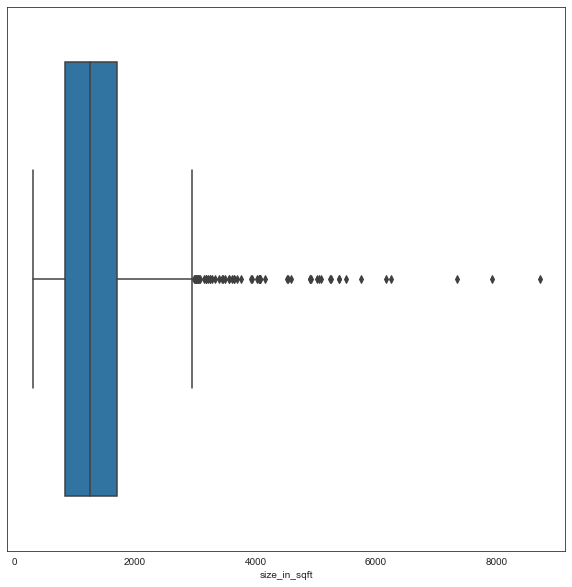

no_of_bedrooms
0.3772310938416035


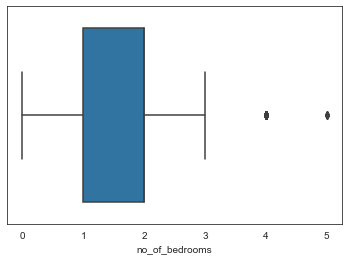

NumAll
0.2719876737063201


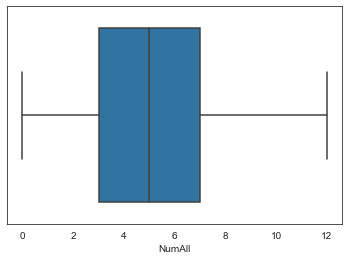

In [62]:
plt.figure(figsize=(10,10))
sns.set_style('white')

for feature in quant_vars:
    print(feature)
    print(X_train[feature].skew())
    sns.boxplot(data=X_train, x=feature)
    plt.show()

In [64]:
Q3_fare = np.quantile(X_train['size_in_sqft'], 0.75)
Q1_fare = np.quantile(X_train['size_in_sqft'], 0.25)
IQR = Q3_fare - Q1_fare
upper_level = Q3_fare + 1.5*IQR
X_train['size_in_sqft'] = X_train['size_in_sqft'].apply(lambda x: upper_level if x>6000 else x)
X_train['size_in_sqft'].skew()

1.9212287505783074

In [65]:
Q3_fare = np.quantile(X_test['size_in_sqft'], 0.75)
Q1_fare = np.quantile(X_test['size_in_sqft'], 0.25)
IQR = Q3_fare - Q1_fare
upper_level = Q3_fare + 1.5*IQR
X_test['size_in_sqft'] = X_test['size_in_sqft'].apply(lambda x: upper_level if x>5000 else x)
X_test['size_in_sqft'].skew()

1.3326719670708744

In [66]:
ohe_cols = ['neighborhood', 'quality']

for feature in ohe_cols:
    dummies_train = pd.get_dummies(X_train[feature], prefix=feature)  # stworzenie kolumn dummies
    dummies_test = pd.get_dummies(X_test[feature], prefix=feature)  # stworzenie kolumn dummies
    mask = X_train[feature].mode().values[0]  # znalezienie najczęstszej wartości
    col_name = feature+'_'+str(mask)
    
    # łączenie zbioru z treningowym i usunięcie niepotrzebnych zmiennych
    X_train = pd.concat([X_train,dummies_train],axis=1)
    X_train.drop(feature, axis=1, inplace=True)
    X_train.drop(col_name, axis=1, inplace=True)
    
    # łączenie zbioru z testowym i usunięcie niepotrzebnych zmiennych
    X_test = pd.concat([X_test,dummies_test],axis=1)
    X_test.drop(feature, axis=1, inplace=True)
    X_test.drop(col_name, axis=1, inplace=True)

# MODELE

In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# REGRESJA LOGISTYCZNA

In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [69]:
reg.fit(X_train, y_train)
y_pred_regresja = reg.predict(X_test)

In [70]:
from sklearn import metrics

In [71]:
MAE_linear = metrics.mean_absolute_error(y_test, y_pred_regresja)
MSE_linear = metrics.mean_squared_error(y_test, y_pred_regresja)
RMSE_linear = np.sqrt(MSE_linear)  # pierwiastek MSE
R2 = metrics.r2_score(y_test, y_pred_regresja)
mean_linear = np.mean(y_test)

In [72]:
results_linear = pd.DataFrame(data = [["Linear Regression", MAE_linear, MSE_linear, RMSE_linear, R2, mean_linear]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)

In [73]:
results_linear

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1100720.538,6.874285e+12,2621885.863,0.39,2238671.313


# Optymalizacja RL nr1 - Regresja grzbietowa

In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [75]:
MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
R2_ridge = metrics.r2_score(y_test, y_pred_ridge)
mean_ridge = np.mean(y_test)

In [76]:
results_ridge = pd.DataFrame(data = [["Linear Regression", MAE_ridge, MSE_ridge, RMSE_ridge, R2, mean_ridge]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)

In [77]:
results_ridge

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1099725.094,6.874528e+12,2621932.063,0.39,2238671.313


In [78]:
parameters = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, i, 10, 100],
    'solver': ['svd', 'cholesky', 'lsqr', 'sag']
}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid = parameters, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                   'view_of_water', 10, 100],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [81]:
ridge = grid.best_estimator_

In [82]:
y_pred_ridge = ridge.predict(X_test)
MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = metrics.mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
R2_ridge = metrics.r2_score(y_test, y_pred_ridge)
mean_ridge = np.mean(y_test)
results_ridge = pd.DataFrame(data = [["Ridge", MAE_ridge, MSE_ridge, RMSE_ridge, R2_ridge, mean_ridge]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_ridge

,Model,MAE,MSE,RMSE,R^2,Mean
0,Ridge,1097561.698,7.035411e+12,2652434.862,0.375,2238671.313


# Optymalizacja RL nr2 - Lasso

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1, 10 ,100]}

In [84]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=lasso, param_grid = parameters, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [85]:
lasso = grid.best_estimator_

In [86]:
y_pred_lasso = lasso.predict(X_test)
MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
R2_lasso = metrics.r2_score(y_test, y_pred_lasso)
mean_lasso = np.mean(y_test)
results_lasso = pd.DataFrame(data = [["Lasso", MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, mean_lasso]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_lasso

,Model,MAE,MSE,RMSE,R^2,Mean
0,Lasso,1100495.326,6.873918e+12,2621815.752,0.39,2238671.313


# Drzewo decyzyjne

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt1 = DecisionTreeRegressor(random_state=12)

In [89]:
dt1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=12)

In [90]:
y_pred_dt1 = dt1.predict(X_test)
MAE_dt1 = metrics.mean_absolute_error(y_test, y_pred_dt1)
MSE_dt1 = metrics.mean_squared_error(y_test, y_pred_dt1)
RMSE_dt1 = np.sqrt(MSE_dt1)
R2_dt1 = metrics.r2_score(y_test, y_pred_dt1)
mean_dt1 = np.mean(y_test)
results_dt1 = pd.DataFrame(data = [["Decision Tree 1", MAE_dt1, MSE_dt1, RMSE_dt1, R2_dt1, mean_dt1]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_dt1

,Model,MAE,MSE,RMSE,R^2,Mean
0,Decision Tree 1,933757.006,6.654585e+12,2579648.144,0.409,2238671.313


# Optymalizacja DD

In [91]:
params = {
    'max_depth': np.arange(2,20),
    'min_samples_split': np.arange(40,80),
    'min_samples_leaf': np.arange(20,100),
    'max_features': np.arange(5,18),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [92]:
dt = DecisionTreeRegressor()

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
random_search = RandomizedSearchCV(estimator=dt, param_distributions = params, cv=5, n_jobs=-1, n_iter=500)
random_search.fit(X_train, y_train)

dt = random_search.best_estimator_

y_pred_dt = dt.predict(X_test)
MAE_dt = metrics.mean_absolute_error(y_test, y_pred_dt)
MSE_dt = metrics.mean_squared_error(y_test, y_pred_dt)
RMSE_dt = np.sqrt(MSE_dt)
R2_dt = metrics.r2_score(y_test, y_pred_dt)
mean_dt = np.mean(y_test)
results_dt = pd.DataFrame(data = [["Decision Tree", MAE_dt, MSE_dt, RMSE_dt, R2_dt, mean_dt]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_dt

,Model,MAE,MSE,RMSE,R^2,Mean
0,Decision Tree,897485.873,4.732241e+12,2175371.503,0.58,2238671.313


# Las losowy

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(random_state=2, criterion='friedman_mse')

In [96]:
rf1.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', random_state=2)

In [97]:
y_pred_rf1 = rf1.predict(X_test)
MAE_rf1 = metrics.mean_absolute_error(y_test, y_pred_rf1)
MSE_rf1 = metrics.mean_squared_error(y_test, y_pred_rf1)
RMSE_rf1 = np.sqrt(MSE_rf1)
R2_rf1 = metrics.r2_score(y_test, y_pred_rf1)
mean_rf1 = np.mean(y_test)
results_rf1 = pd.DataFrame(data = [["Forest 1", MAE_rf1, MSE_rf1, RMSE_rf1, R2_rf1, mean_rf1]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_rf1

,Model,MAE,MSE,RMSE,R^2,Mean
0,Forest 1,768298.403,4.611098e+12,2147346.741,0.591,2238671.313


# Optymalizacja LL

In [98]:
bootstrap = [True, False]
n_estimators = np.arange(10,150,30)
max_depth = np.arange(2,20)
min_samples_split = np.arange(40,80)
min_samples_leaf = np.arange(20,100)
max_features = ['log2', 'sqrt', None]

In [99]:
para_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [111]:
random_search = RandomizedSearchCV(estimator=rf1, param_distributions = para_grid, cv=5, n_jobs=-1, n_iter=500, error_score='raise')

In [112]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(criterion='friedman_mse',
                                                   random_state=2),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_split': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130])})

In [113]:
rf = random_search.best_estimator_

In [114]:
y_pred_rf = rf.predict(X_test)
MAE_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
MSE_rf = metrics.mean_squared_error(y_test, y_pred_rf)
RMSE_rf = np.sqrt(MSE_rf)
R2_rf = metrics.r2_score(y_test, y_pred_rf)
mean_rf = np.mean(y_test)
results_rf = pd.DataFrame(data = [["Forest", MAE_rf, MSE_rf, RMSE_rf, R2_rf, mean_rf]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_rf

,Model,MAE,MSE,RMSE,R^2,Mean
0,Forest,889573.557,5.367143e+12,2316709.566,0.524,2238671.313


# XGBoost

In [105]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [106]:
params = {
    'max_depth': np.arange(3,15),
    'min_child_weight': np.arange(8,15),
    'gamma': [i/10.0 for i in range(4,10)],
    'subsample': [i/10.0 for i in range(5,8)],
    'colsample_bytree': [i/10.0 for i in range(6,10)]
}

In [107]:
random_search = RandomizedSearchCV(xgb_reg, param_distributions = params, cv=5, n_jobs=-1, n_iter=500)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_child_weight': array([ 8,  9, 10, 11, 12, 13, 14]),
                                        'subsample': [0.5, 0.6, 0.7]})

In [108]:
xgb = random_search.best_estimator_

In [109]:
y_pred_xgb = xgb.predict(X_test)
MAE_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
RMSE_xgb = np.sqrt(MSE_xgb)
R2_xgb = metrics.r2_score(y_test, y_pred_xgb)
mean_xgb = np.mean(y_test)
results_xgb = pd.DataFrame(data = [["XGB", MAE_xgb, MSE_xgb, RMSE_xgb, R2_xgb, mean_xgb]],
                             columns = ["Model", "MAE", "MSE", "RMSE", "R^2", "Mean"]).round(3)
results_xgb

,Model,MAE,MSE,RMSE,R^2,Mean
0,XGB,774152.595,3.760013e+12,1939075.192,0.666,2238671.313


In [110]:
pd.concat([results_linear, results_ridge, results_lasso, results_dt1, results_dt, results_rf1, results_rf, results_xgb])

,Model,MAE,MSE,RMSE,R^2,Mean
0,Linear Regression,1100720.538,6.874285e+12,2621885.863,0.390,2238671.313
0,Ridge,1097561.698,7.035411e+12,2652434.862,0.375,2238671.313
0,Lasso,1100495.326,6.873918e+12,2621815.752,0.390,2238671.313
0,Decision Tree 1,933757.006,6.654585e+12,2579648.144,0.409,2238671.313
0,Decision Tree,897485.873,4.732241e+12,2175371.503,0.580,2238671.313
0,Forest 1,768298.403,4.611098e+12,2147346.741,0.591,2238671.313
0,Forest,892569.910,5.401277e+12,2324064.785,0.521,2238671.313
0,XGB,774152.595,3.760013e+12,1939075.192,0.666,2238671.313


Najlepiej wyszedł model XGBoost. Optymalizacja w regresji liniowej nic nie dała, bardzo słabe wyniki. W drzewie decyzyjnym już lepsze i optymalizacja dała dużo. Z kolei w lesie losowym optymalizacja popsuła model.